In [1]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define relevant variables for the ML task
batch_size = 64
num_classes = 120
learning_rate = 0.001
num_epochs = 10

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# Create Training dataset
train_dataset = torchvision.datasets.ImageFolder(root = '../42_split/train',

                                             transform = all_transforms,
                                             )

# Create Testing dataset
test_dataset = torchvision.datasets.ImageFolder(root = '../42_split/test',

                                            transform = all_transforms,
                                            )

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

In [3]:
next(iter(train_loader))

[tensor([[[[-1.8042e-01, -2.1919e-01, -5.9512e-03,  ...,  1.1571e+00,
             1.8162e+00,  1.8550e+00],
           [ 1.3434e-02, -1.2226e-01,  7.1589e-02,  ...,  1.1571e+00,
             1.2153e+00,  1.2153e+00],
           [-1.4165e-01, -5.9512e-03,  5.2204e-02,  ...,  4.7867e-01,
             3.0421e-01,  3.6236e-01],
           ...,
           [ 1.1571e+00,  1.3316e+00,  1.0796e+00,  ...,  9.6329e-01,
             9.4391e-01,  9.4391e-01],
           [ 1.2735e+00,  1.0602e+00,  1.0408e+00,  ...,  1.1184e+00,
             8.4699e-01,  5.5621e-01],
           [ 1.2541e+00,  1.0990e+00,  1.2153e+00,  ...,  8.6637e-01,
             9.0514e-01,  9.2452e-01]],
 
          [[-5.8233e-02, -9.7567e-02,  7.6703e-04,  ...,  1.2791e+00,
             1.9085e+00,  1.9478e+00],
           [-3.8567e-02, -1.7623e-01, -5.8233e-02,  ...,  1.1414e+00,
             1.1808e+00,  1.1808e+00],
           [-2.3524e-01, -9.7567e-02, -1.5657e-01,  ...,  3.9410e-01,
             2.1710e-01,  3.1544e-01],


In [3]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
    #  Determine what layers and their order in CNN object
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    # Progresses data across layers
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)

        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [4]:
# model = ConvNeuralNet(num_classes).to(device)
#
# # Set Loss function with criterion
# criterion = nn.CrossEntropyLoss()
#
# # Set optimizer with optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)
#
# total_step = len(train_loader)

In [5]:
# # We use the pre-defined number of epochs to determine how many iterations to train the network on
# for epoch in range(num_epochs):
#     #Load in the data in batches using the train_loader object
#     for i, (images, labels) in enumerate(train_loader):
#         # Move tensors to the configured device
#         images = images.to(device)
#         labels = labels.to(device)
#
#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#
#     print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [6]:
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in train_loader:
#         images = images.to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#
#     print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))


In [7]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=num_classes):
        super(ConvNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(128 * 9 * 9, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 120),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 128 * 9 * 9)
        x = self.classifier(x)
        return x

In [8]:
net = ConvNet()
net.to(device)
criterion = nn.CrossEntropyLoss()
# also the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(1, 10):  # loop over the dataset multiple times

    running_loss = .0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs
        # inputs, labels = data
        # if device == 'cuda':
        inputs, labels = images.to(device), labels.to(device)

        # reset the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    running_loss /= len(train_loader)
    train_loss.append(running_loss)
    running_acc = correct / total
    train_acc.append(running_acc)

    if epoch % 4 == 0:
        print('\nEpoch: {}'.format(epoch))
        print('Train Acc. => {:.3f}%'.format(100 * running_acc), end=' | ')
        print('Train Loss => {:.5f}'.format(running_loss))

    # evaluate on the test set
    # note this is usually performed on the validation set
    # for simplicity we just evaluate it on the test set
    with torch.no_grad():
        correct = 0
        total = 0
        test_running_loss = .0
        for data in test_loader:
            inputs, labels = data
            # if device == 'cuda':
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_running_loss /= len(test_loader)
        test_loss.append(test_running_loss)
        test_running_acc = correct / total
        test_acc.append(test_running_acc)

        if epoch % 4 == 0:
            print('Test Acc.  => {:.3f}%'.format(100 * test_running_acc), end=' | ')
            print('Test Loss  => {:.5f}'.format(test_running_loss))

print('Finished Training')


Epoch: 4
Train Acc. => 5.069% | Train Loss => 4.39343
Test Acc.  => 4.300% | Test Loss  => 4.42472

Epoch: 8
Train Acc. => 8.416% | Train Loss => 4.11996
Test Acc.  => 5.831% | Test Loss  => 4.28363
Finished Training


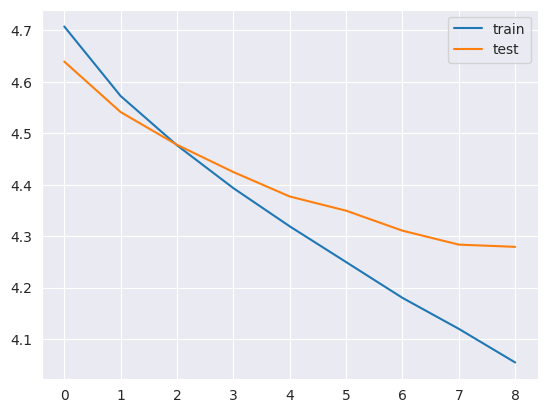

In [11]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.show()

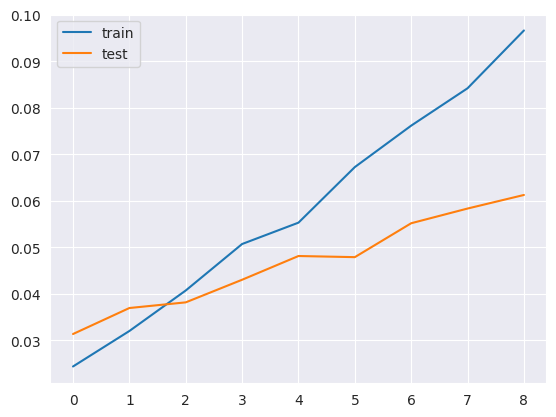

In [12]:
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.legend()
plt.show()

In [ ]:
def linear_block(input_size, output_size):
    return torch.nn.Sequential(
        torch.nn.Linear(input_size, output_size),
        torch.nn.ReLU()
    )

def conv_block(input_channels, output_channels):
    return torch.nn.Sequential(
        torch.nn.Conv2d(input_channels, output_channels, (3, 3), padding=1),
        torch.nn.ReLU()
    )

class NN(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            linear_block(input_size, 256),
            linear_block(256, 128),
            linear_block(128, 64),
            linear_block(64, 16),
            torch.nn.Linear(16, 1)
        )

    def forward(self, x):
        out = self.main(x)
        return out

# class CNN(torch.nn.Module):
#     def __init__(self, input_channels):
#         super().__init__()
#         self.main = torch.nn.Sequential(
#             conv_block(input_channels, 3),
#             conv_block(3, 3),
#             conv_block(3, 3),
#             conv_block(3, 3),
#             conv_block(3, 3),
#             torch.nn.Flatten(),
#             torch.nn.Linear(49152, 1)
#         )
#
#     def forward(self, x):
#         out = self.main(x)
#         return out

In [13]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            #Input = 3 x 32 x 32, Output = 32 x 32 x 32
            torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 32 x 32 x 32, Output = 32 x 16 x 16
            torch.nn.MaxPool2d(kernel_size=2),

            #Input = 32 x 16 x 16, Output = 64 x 16 x 16
            torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 16 x 16, Output = 64 x 8 x 8
            torch.nn.MaxPool2d(kernel_size=2),

            #Input = 64 x 8 x 8, Output = 64 x 8 x 8
            torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
            torch.nn.ReLU(),
            #Input = 64 x 8 x 8, Output = 64 x 4 x 4
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Flatten(),
            torch.nn.Linear(64*4*4, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 120)
        )

    def forward(self, x):
        return self.model(x)


Epoch 1/10: Training loss = 4.7340503561085665
Epoch 2/10: Training loss = 4.586749711941028
Epoch 3/10: Training loss = 4.5308290000619555
Epoch 4/10: Training loss = 4.479232911405893
Epoch 5/10: Training loss = 4.372695143880515
Epoch 6/10: Training loss = 4.3071952523856325
Epoch 7/10: Training loss = 4.258887313563248
Epoch 8/10: Training loss = 4.2240857214763246
Epoch 9/10: Training loss = 4.186180377828664
Epoch 10/10: Training loss = 4.160566690666922


Text(0, 0.5, 'Training loss')

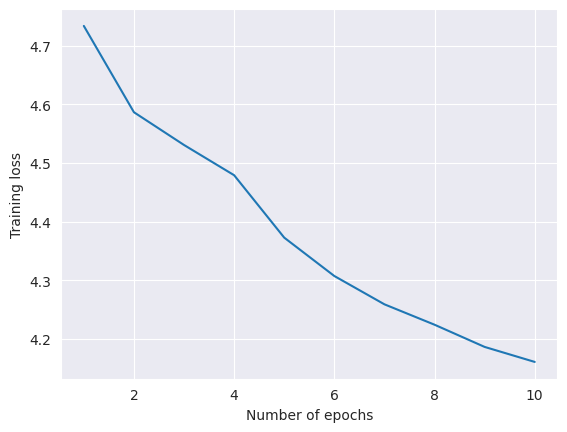

In [14]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

#Defining the model hyper parameters
num_epochs = 10
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0

    #Iterating over the training dataset in batches
    model.train()
    for i, (images, labels) in enumerate(train_loader):

        #Extracting images and target labels for the batch being iterated
        images = images.to(device)
        labels = labels.to(device)

        #Calculating the model output and the cross entropy loss
        outputs = model(images)
        loss = criterion(outputs, labels)

        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")

#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


In [15]:
test_acc=0
model.eval()

with torch.no_grad():
    #Iterating over the training dataset in batches
    for i, (images, labels) in enumerate(test_loader):

        images = images.to(device)
        y_true = labels.to(device)

        #Calculating outputs for the batch being iterated
        outputs = model(images)

        #Calculated prediction labels from models
        _, y_pred = torch.max(outputs.data, 1)

        #Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")


Test set accuracy = 6.2682215743440235 %
